# Worksheet 21

Name:  
UID: 

### Topics

- Logistic Regression
- Gradient Descent

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

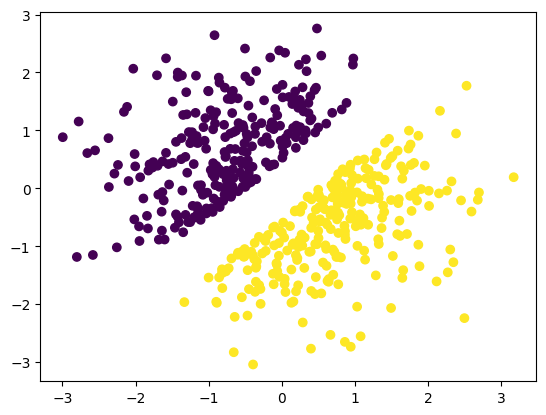

In [2]:
X,Y = generate_line_data()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_
beta = model.coef_[0]
intercept = model.intercept_

In [4]:
print(model.coef_)
print(model.intercept_)

[[ 4.11128306 -4.10408124]]
[0.06146435]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

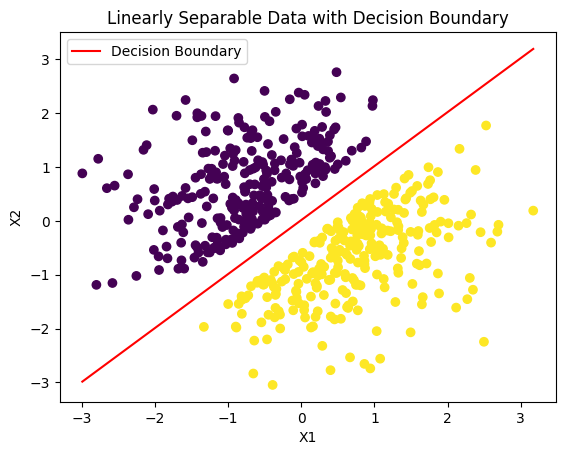

In [5]:
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = (-intercept - beta[0] * x_vals) / beta[1]
plt.plot(x_vals, y_vals, color='r', linestyle='-', label='Decision Boundary')
plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

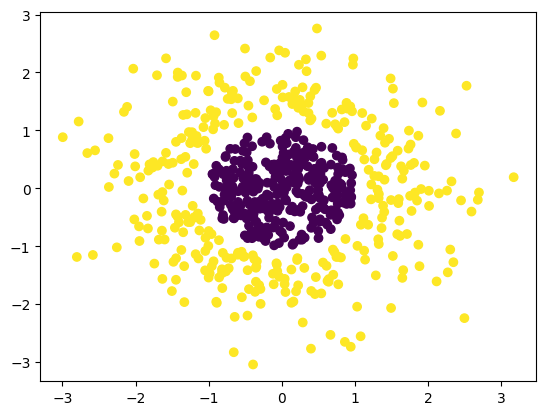

In [6]:
X,Y = generate_circle_data(t)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(X)

model = LogisticRegression().fit(X_transformed, Y)
print(model.coef_)
print(model.intercept_)

[[-4.78121845e-04  3.00682605e-02 -4.75570019e-02  4.90934227e+00
   3.79837285e-01  4.95695261e+00]]
[-6.47663464]


f) Plot the decision boundary using the code below.

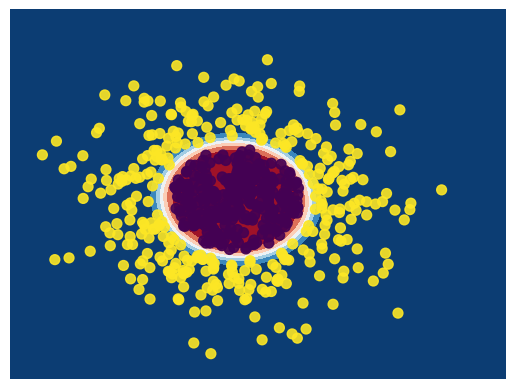

In [8]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]
meshData = poly.transform(meshData)


fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

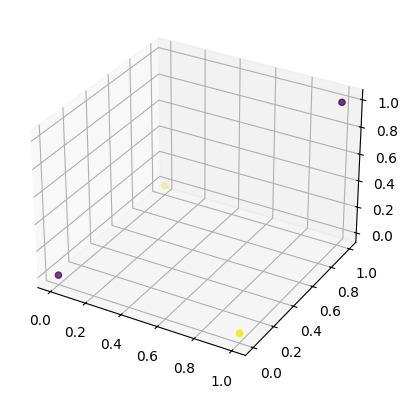

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

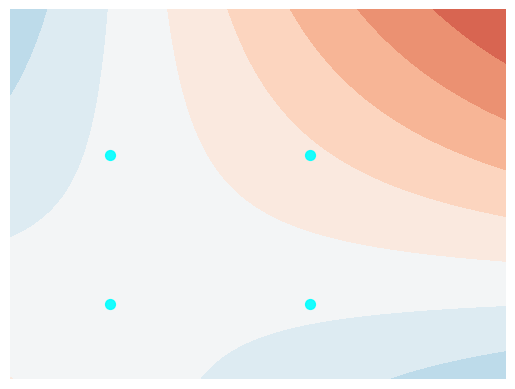

In [10]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


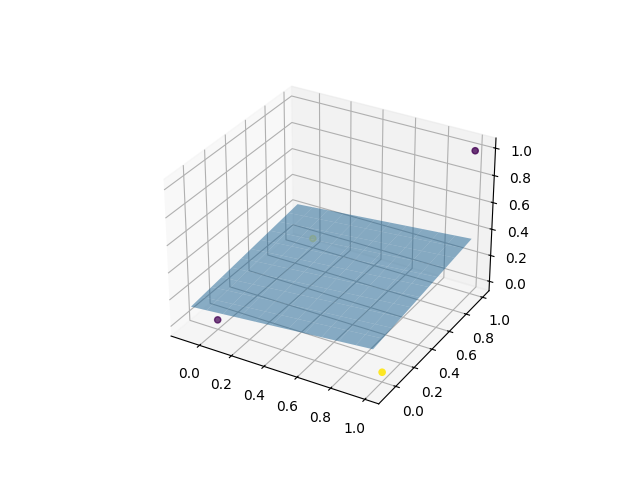

In [11]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  1.56782D+00

At iterate    1    f=  8.95383D-01    |proj g|=  5.58383D-01

At iterate    2    f=  8.27195D-01    |proj g|=  3.32189D-01

At iterate    3    f=  7.96120D-01    |proj g|=  6.06694D-01

At iterate    4    f=  7.66577D-01    |proj g|=  1.62504D-01

At iterate    5    f=  7.38227D-01    |proj g|=  1.74906D-01

At iterate    6    f=  6.22098D-01    |proj g|=  1.59122D-01

At iterate    7    f=  4.78311D-01    |proj g|=  1.20393D-01

At iterate    8    f=  2.88632D-01    |proj g|=  2.29261D-01

At iterate    9    f=  2.73371D-01    |proj g|=  3.32278D-01

At iterate   10    f=  1.61027D-01    |proj g|=  1.86164D-01

At iterate   11    f=  1.31057D-01    |proj g|=  8.20086D-02

At iterate   12    f=  1.09857D-01    |proj g|=  4.31233D-02

At iterate   13    f=  9.5

 This problem is unconstrained.


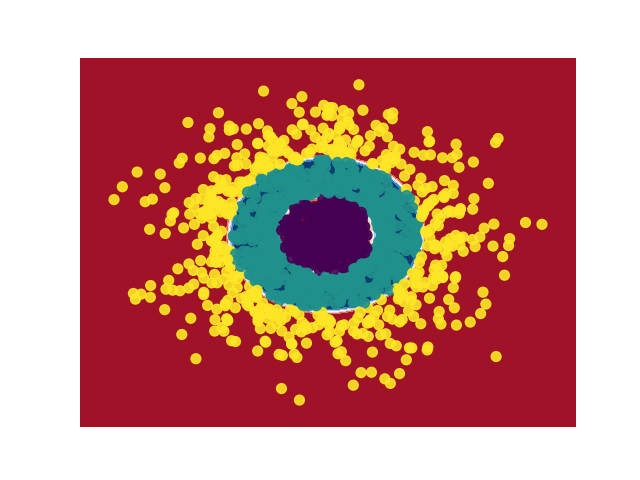

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr)
model.fit(X, Y)

# Mesh grid parameters optimized for speed and memory
h = 0.05  # Increased step size to reduce the number of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, int((x_max - x_min)/h)),
                     np.linspace(y_min, y_max, int((y_max - y_min)/h)))

# Prediction over the mesh grid
meshData = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(meshData)[:, 1].reshape(xx.shape)

# Visualization setup
fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

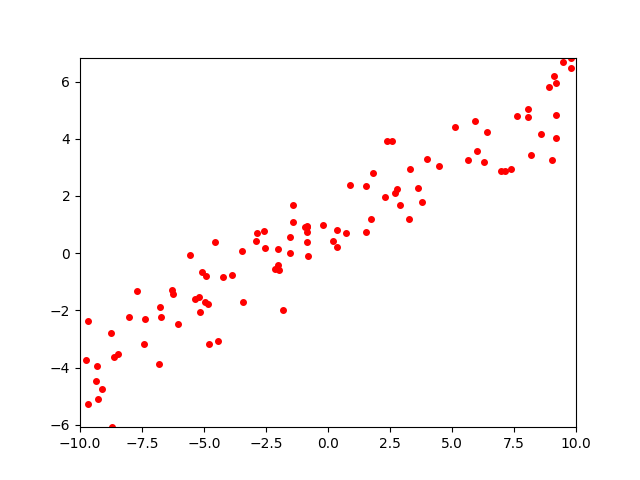

In [89]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

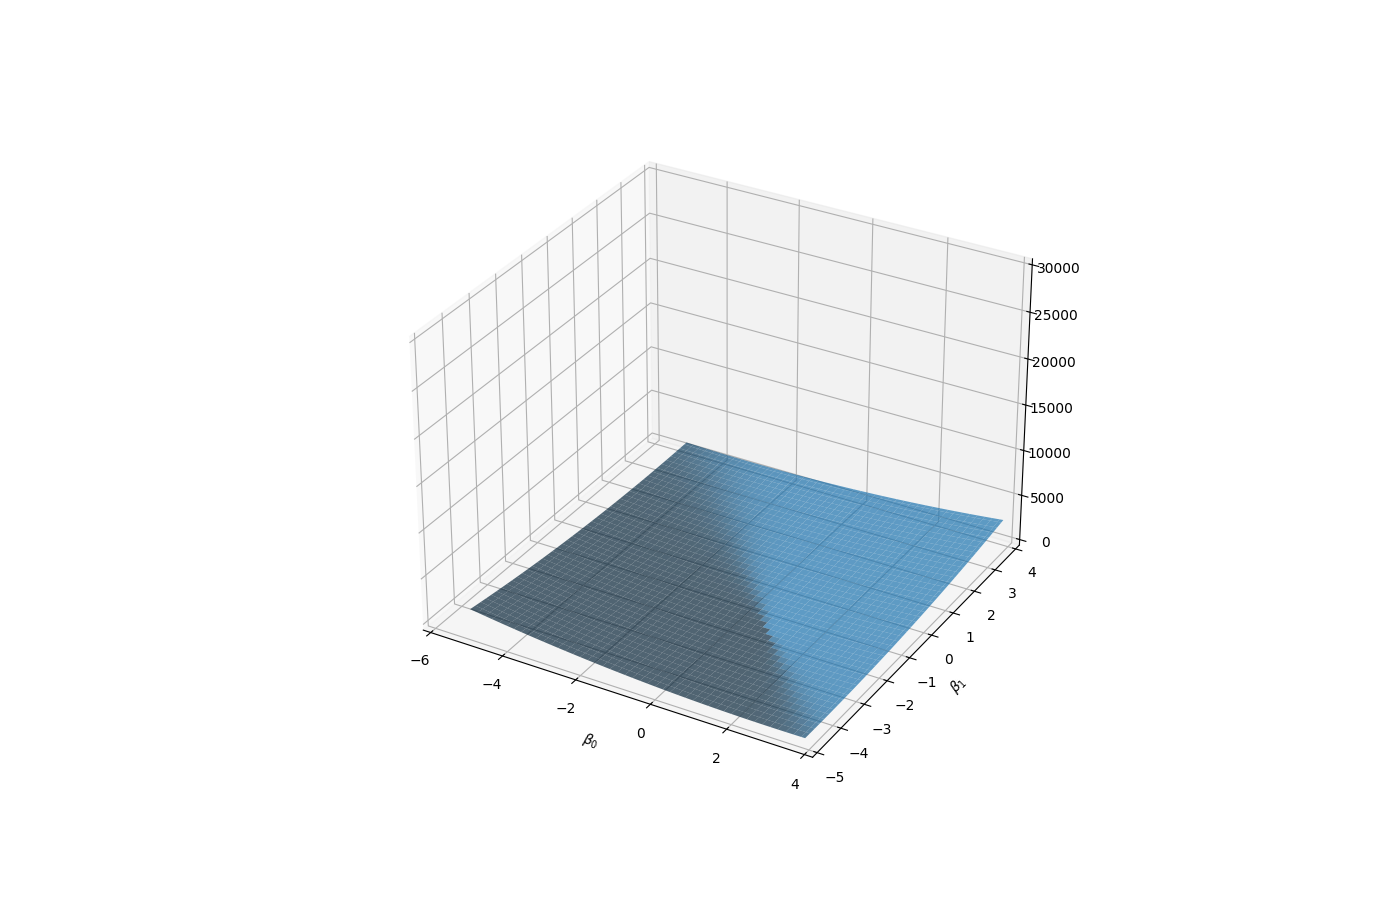

In [88]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(100, 2)  
y = X @ np.array([1.5, -2.0]) + np.random.randn(100) * 2  

def loss(X, y, beta):
    residuals = y - X.dot(beta)
    return np.sum(residuals**2)

b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(np.ravel(B0), np.ravel(B1)):
        beta = np.array([b0, b1])
        res.append(loss(X, y, beta))
    return np.array(res).reshape(B0.shape)

cost = get_cost(b0, b1)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

ax.plot_surface(b0, b1, cost, alpha=.7)

# Show plot
plt.show()


Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def loss(X, y, beta):
    residuals = y - X.dot(beta)
    return np.sum(residuals**2)

def gradient(X, y, beta):
    return 2 * X.T.dot(X.dot(beta) - y)

def snap(betas, losses, b0, b1, cost):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 5)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 5)
    ax.set_zlim(0, np.max(cost) + 10)
    
    ax.plot_surface(b0, b1, cost, color='blue', alpha=.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', color='red', markersize=10, zorder=10)
    plt.close(fig)
    
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    return Image.open(buf)

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images, b0, b1, cost):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat.copy()]

    for _ in range(epochs):
        beta_hat -= learning_rate * gradient(X, y, beta_hat)
        current_loss = loss(X, y, beta_hat)
        losses.append(current_loss)
        betas.append(beta_hat.copy())
        images.append(snap(betas, losses, b0, b1, cost))

    return np.array(betas), np.array(losses)

beta_start = np.array([-5, -2], dtype=np.float64)
learning_rate = 0.0002
epochs = 10
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images, b0, b1, cost)

images[0].save(
    'gd.gif',
    format='GIF',
    append_images=images[1:],
    save_all=True,
    duration=500,
    loop=0
)


c) Use the code above to create an animation of the linear model learned at every epoch.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def loss(X, y, beta):
    residuals = y - np.dot(X, beta)
    return np.sum(residuals ** 2)

def gradient(X, y, beta):
    return 2 * np.dot(X.T, (np.dot(X, beta) - y))

def snap_model(beta, X, y):
    xplot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)  
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(X[:, 1], y, 'ro', markersize=4)
    ax.set_xlim(min(X[:, 1]), max(X[:, 1]))
    ax.set_ylim(min(y) - 1, max(y) + 1)

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    images = []
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat.copy()]

    for _ in range(epochs):
        images.append(snap_model(beta_hat, X, y))
        beta_hat -= learning_rate * gradient(X, y, beta_hat)
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat.copy())

    return np.array(betas), np.array(losses), images


beta_start = np.array([-5, 1], dtype=float)
learning_rate = 0.001
epochs = 100


betas, losses, images = gradient_descent(X, y, beta_start, learning_rate, epochs)


images[0].save(
    'model.gif',
    format='GIF',
    append_images=images[1:],
    save_all=True,
    duration=200,
    loop=0
)


In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

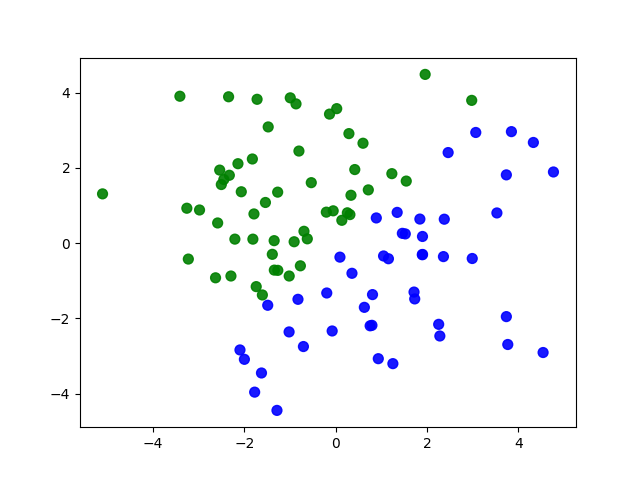

In [83]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

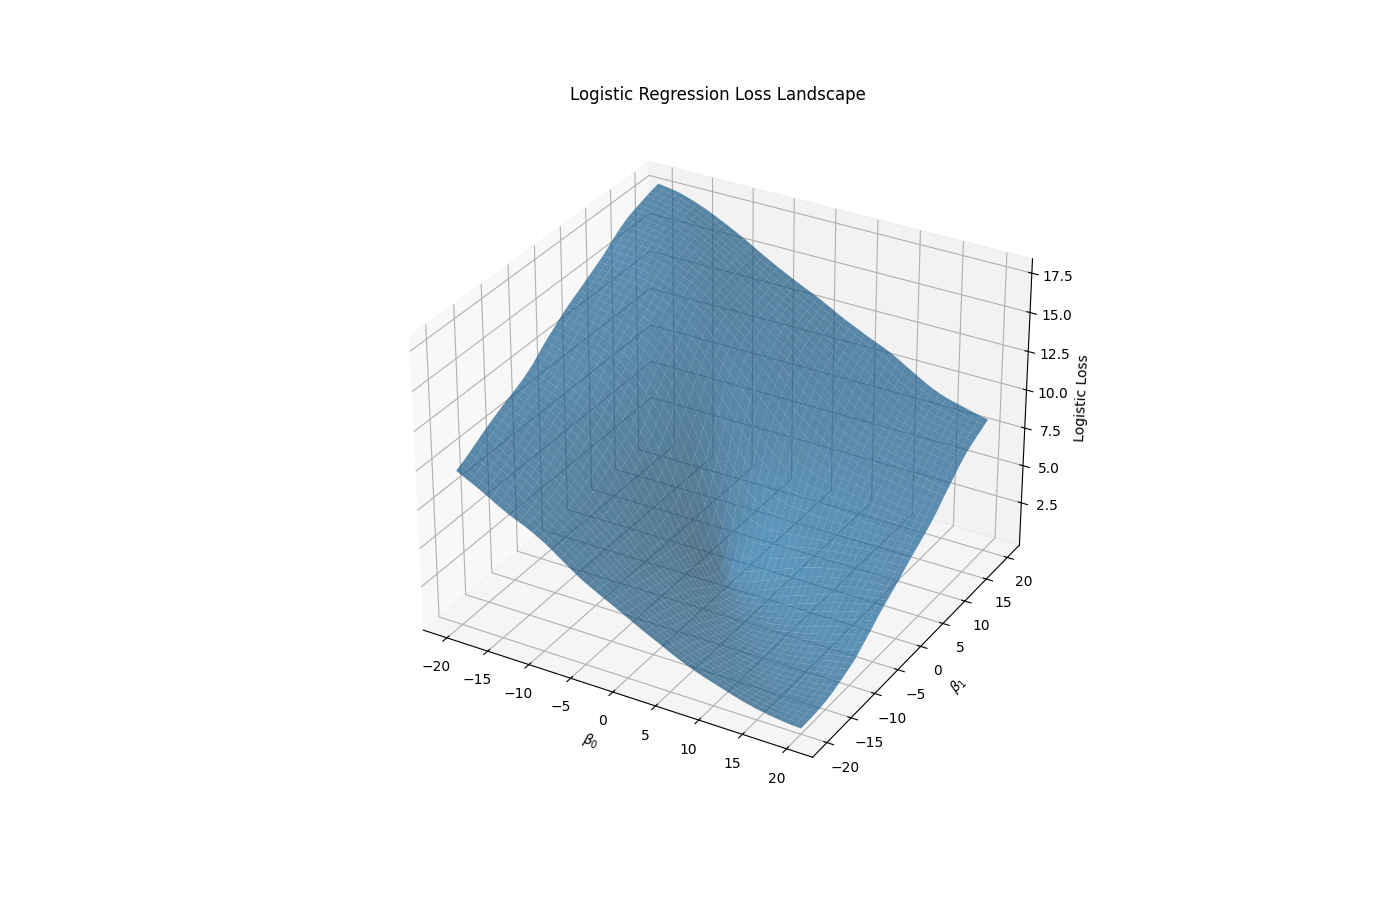

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def loss(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return -np.mean(y * np.log(pred + 1e-9) + (1 - y) * np.log(1 - pred + 1e-9))

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)


def generate_line_data():
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()


X_new = np.hstack([np.ones((X.shape[0], 1)), X])


b0 = np.linspace(-20, 20, 50)
b1 = np.linspace(-20, 20, 50)
b_intercept = np.linspace(-20, 20, 50)  # Range for the intercept term
B0, B1, BIntercept = np.meshgrid(b0, b1, b_intercept)

def get_cost(B0, B1, BIntercept):
    res = []
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            for k in range(B0.shape[2]):
                beta = np.array([BIntercept[i, j, k], B0[i, j, k], B1[i, j, k]])
                line_cost = loss(X_new, y, beta)
                res.append(line_cost)
    return np.array(res).reshape(B0.shape)

cost = get_cost(B0, B1, BIntercept)


fig = plt.figure(figsize =(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B0[:, :, 25], B1[:, :, 25], cost[:, :, 25], alpha=0.7)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('Logistic Loss')
ax.set_title('Logistic Regression Loss Landscape')
plt.show()


e) Plot the loss at each iteration of the gradient descent algorithm.

In [77]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(B0[:, :, 25], B1[:, :, 25], cost[:, :, 25], color='b', alpha=0.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def loss(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return -np.mean(y * np.log(pred + 1e-9) + (1 - y) * np.log(1 - pred + 1e-9))


def gradient(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return np.dot(X.T, (pred - y)) / y.size


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2, -2])  
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X_new, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


f) Create an animation of the logistic regression fit at every epoch.

MovieWriter imagemagick unavailable; using Pillow instead.


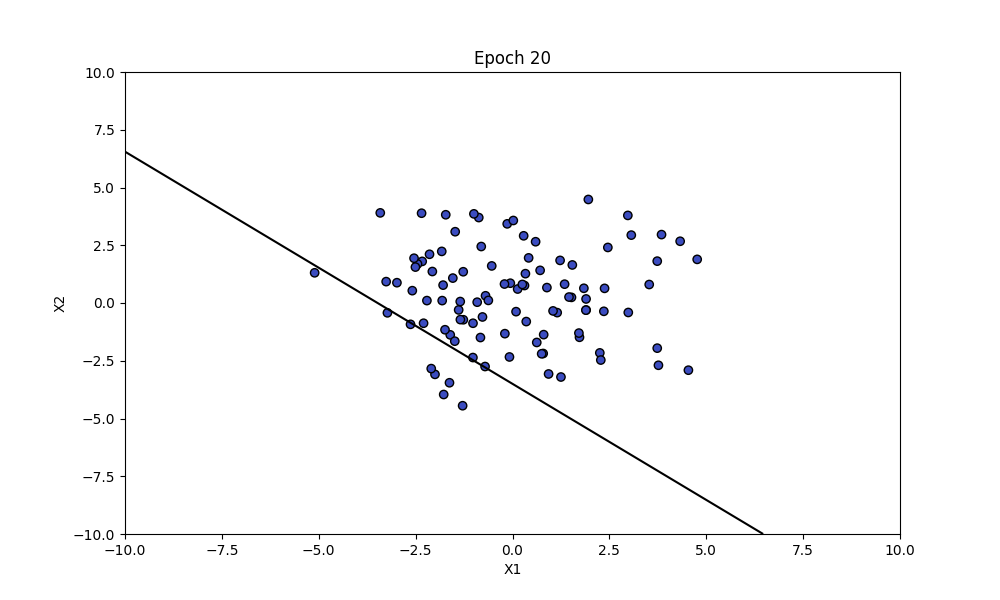

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return -np.mean(y * np.log(pred + 1e-9) + (1 - y) * np.log(1 - pred + 1e-9))

def gradient(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return np.dot(X.T, (pred - y)) / y.size

def gradient_descent(X, y, beta_hat, learning_rate, epochs):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

def plot_decision_boundary(betas, X, y, ax):
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(betas[-1][0] + betas[-1][1]*X1 + betas[-1][2]*X2)
    ax.contour(X1, X2, Z, levels=[0.5], colors='black')

X, y = datasets.make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=2, random_state=0)
X_new = np.hstack([np.ones((X.shape[0], 1)), X])

beta_start = np.array([-5, -2, -2])  
learning_rate = 0.1
epochs = 20

betas, _ = gradient_descent(X_new, y, beta_start, learning_rate, epochs)

fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'Epoch {i+1}')
    plot_decision_boundary(betas[:i+1], X_new, y, ax)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=500)

anim.save('logistic_regression_animation.gif', writer='imagemagick')


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return -np.mean(y * np.log(pred + 1e-9) + (1 - y) * np.log(1 - pred + 1e-9))

def gradient(X, y, beta):
    z = np.dot(X, beta)
    pred = sigmoid(z)
    return np.dot(X.T, (pred - y)) / y.size

def gradient_descent(X, y, beta_hat, learning_rate, epochs, batch_size):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        idx = np.random.choice(len(X), batch_size, replace=False)
        X_batch, y_batch = X[idx], y[idx]
        beta_hat = beta_hat - learning_rate * gradient(X_batch, y_batch, beta_hat)
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

def plot_decision_boundary(betas, X, y, ax):
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(betas[-1][0] + betas[-1][1]*X1 + betas[-1][2]*X2)
    ax.contour(X1, X2, Z, levels=[0.5], colors='black')

def true_loss(X, y, betas):
    losses = [loss(X, y, beta) for beta in betas]
    return np.array(losses)

X, y = datasets.make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=2, random_state=0)
X_new = np.hstack([np.ones((X.shape[0], 1)), X])

beta_start = np.array([-5, -2, -2])  
learning_rate = 0.1
epochs = 20
batch_size = 20  

betas, _ = gradient_descent(X_new, y, beta_start, learning_rate, epochs, batch_size)

fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'Epoch {i+1}')
    plot_decision_boundary(betas[:i+1], X_new, y, ax)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    true_losses = true_loss(X_new, y, betas[:i+1])
    approx_losses = true_losses[-1]  
    ax2 = ax.twinx()
    ax2.plot(range(i+1), true_losses, 'b-', label='True Loss')  
    ax2.plot(range(i+1), np.full(i+1, approx_losses), 'r--', label='Approx Loss')  
    ax2.set_ylabel('Loss')
    ax2.legend()

anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=500)

anim.save('logistic_regression_animation.gif', writer='imagemagick')

plt.close(fig)  


MovieWriter imagemagick unavailable; using Pillow instead.


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [80]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)